Naive Bayes for Mushroom Data
---------------------------------------------------

[0 1 1 ... 1 1 1]
Accuracy on test data is 0.93
Naive Bayes Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93       843
           1       0.93      0.92      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



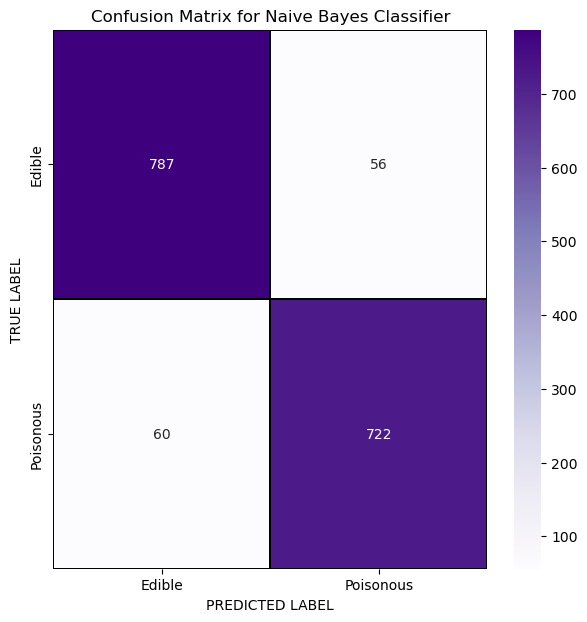

K-Nearest Neighbors for Mushroom Data
---------------------------------------------------

Best KNN Value: 1
Accuracy on test data is 1.00
KNN Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



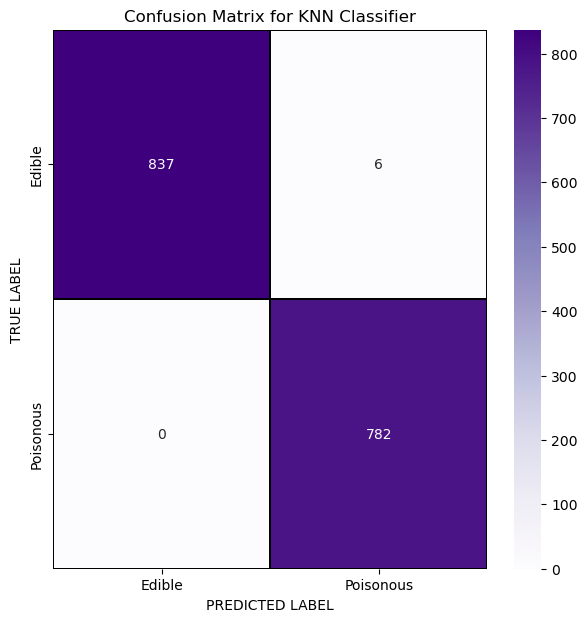

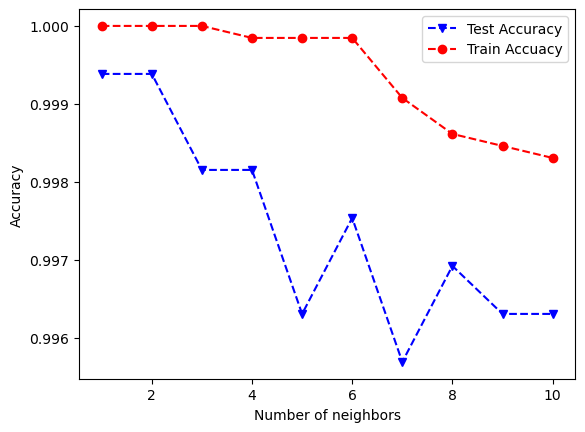

Support Vector Machines for Mushroom Data
---------------------------------------------------

Accuracy on test data: 100.0%
SVM Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



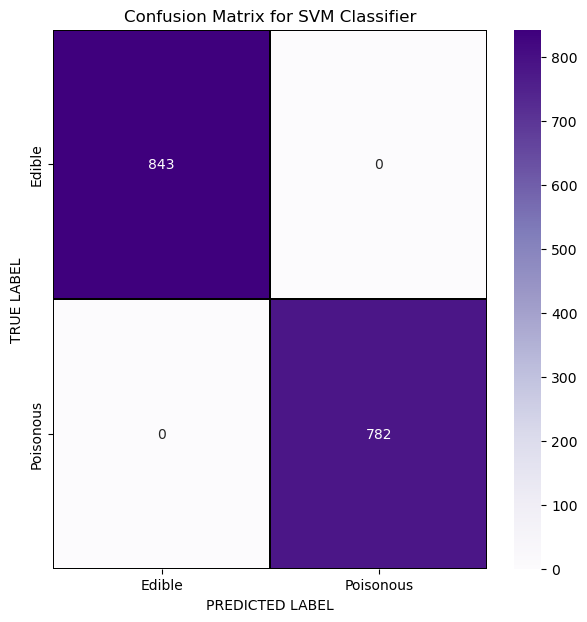

Linear Decision Boundary


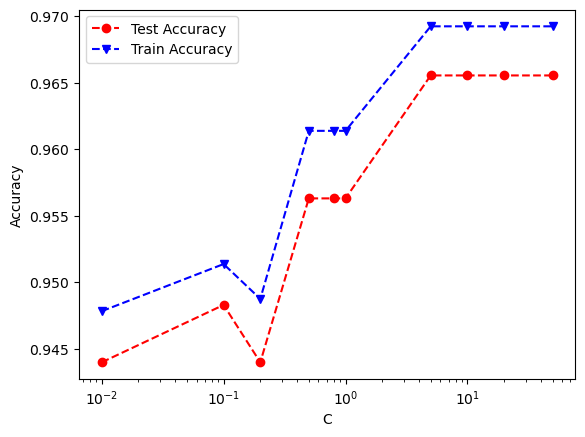

Non-Linear Decision Boundary


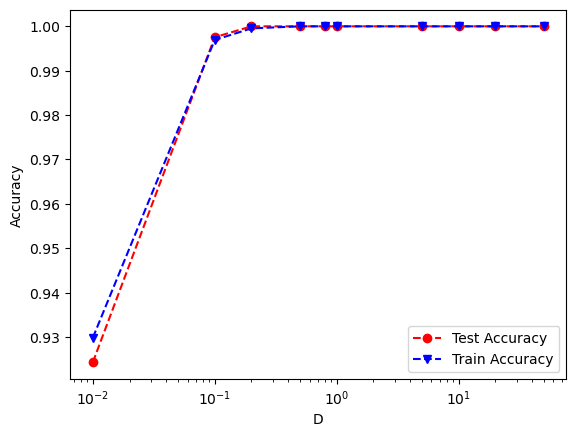

In [4]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
#import osimport graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Reading the Data Sets from the DataSets Folder(unemployment data set, admission data set)
path = "./DataSets/"

filename_read = os.path.join(path,"mushrooms.csv")
df_mushrooms = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = os.path.join(path,"Churn_Modelling.csv")
df_churn = pd.read_csv(filename_read, na_values=['NA','?'])

warnings.filterwarnings('ignore')

#Data preprocessing(Lable encoding and Dropping Unnecessary Fields for mushrooms)
df_mushrooms = df_mushrooms.astype('category')
df_mushrooms.dtypes

labelencoder=LabelEncoder()
for column in df_mushrooms.columns:
    df_mushrooms[column] = labelencoder.fit_transform(df_mushrooms[column])

df_mushrooms = df_mushrooms.drop(["veil-type"], axis=1)

#Training/Test Split
X = df_mushrooms.drop(['class'], axis=1)
y = df_mushrooms["class"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#Naive Bayes for Mushrooms(Tanner Colbert)
print('Naive Bayes for Mushroom Data')
print("---------------------------------------------------")
print()

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print(nb_pred)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, nb_pred)))

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification Report: \n\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

#K-Nearest Neighbors for Mushrooms(Tanner Colbert)
print('K-Nearest Neighbors for Mushroom Data')
print("---------------------------------------------------")
print()

best_Kvalue = 0
accuracy = 0
numNeighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
testAcc = []
trainAcc = []

for i in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    knn_pred = clf.predict(X_test.values)
    knn_pred_train = clf.predict(X_train.values)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y_train,knn_pred_train))
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test.values, y_test.values) > accuracy:
        accuracy = knn.score(X_train.values, y_train.values)
        best_Kvalue = i
                
print("Best KNN Value: {}".format(best_Kvalue))
print("Accuracy on test data is %.2f" % (accuracy))

y_pred_knn = knn.predict(X_test.values)
print("KNN Classification Report: \n\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#Support Vector Machines for Mushrooms(Tanner Colbert)
print('Support Vector Machines for Mushroom Data')
print("---------------------------------------------------")
print()

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Accuracy on test data: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

y_pred_svm = svm.predict(X_test)
print("SVM Classification Report: \n\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show() 

print('Linear Decision Boundary')
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []

for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train,y_train)
    svml_pred = clf.predict(X_test.values)
    svml_pred_train = clf.predict(X_train.values)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y_train,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

print('Non-Linear Decision Boundary')
D = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc2 = []
SVMLtrainAcc2 = []

for param in D:
    clf2 = SVC(C=param,kernel='rbf',gamma='auto')
    clf2.fit(X_train,y_train)
    svml_pred2 = clf2.predict(X_test.values)
    svml_pred_train2 = clf2.predict(X_train.values)
    SVMLtestAcc2.append(accuracy_score(y_test, svml_pred2))
    SVMLtrainAcc2.append(accuracy_score(y_train,svml_pred_train2))

plt.plot(D, SVMLtestAcc2,'ro--', D,SVMLtrainAcc2,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('D')
plt.xscale('log')
plt.ylabel('Accuracy')  
plt.show()

#Decision Tree for Mushrooms(Kevinpreet Deol)

#Logistic Regression for Mushrooms(Kevinpreet Deol)

#Naive Bayes for Churn(Julian Martinez)

#K-Nearet Neighbors for Churn(Julian Martinez)

#Support Vector Machines for Churn(Curtis Berry)

#Decision Tree for Churn(Shajaat Ali)

#Logistic Regression for Churn(Curtis Berry)